# Extração e processamento de steam_games.csv

### 1. Importação dos módulos

***Obs.:*** *Optou-se por uma abordagem modular em que o main_notebook serve para executar todo o programa e dar uma visão geral. Para detalhes do funcionamento veja a pasta de src*

In [1]:
# Importação dos módulos
import src.game
from src.game import load_and_extract_games, Game
from src.export import export_to_excel

### 2. Definição dos caminhos relativos

In [2]:
# Caminhos
zip_path = "data/raw/steam_games.zip"
extract_folder = "data/raw"
csv_path = "data/raw/steam_games.csv"
excel_output = "data/processed/randon_20_lines.xlsx"

### 3. Processamento dos dados
#### 3.1. Extrair e carregar os jogos

In [3]:
# Extrair e carregar os jogos
games = load_and_extract_games(zip_path, extract_folder)

#### 3.2. Encontrar o percentual de jogos gratuitos na plataforma

In [4]:
percentual_jogos_gratuitos = Game.percentual_gratuitos(games)
print(f"📊 Percentual de jogos gratuitos: {percentual_jogos_gratuitos}")

📊 Percentual de jogos gratuitos: 17.39%


#### 3.3. Encontrar o ano com mais lançamentos de games na Steam

In [7]:
anos_com_mais_lancamentos = Game.ano_maior_numero_lancamentos(games)
print(f"📅 Ano(s) com maior número de lançamentos: {anos_com_mais_lancamentos}")

📅 Ano(s) com maior número de lançamentos: [2022]


#### 3.4. Descobrir os jogos com maior número de usuários simultâneos, juntamente com percentual de avaliações positivas e tempo médio de jogo de acordo com o *dataset*

In [5]:
top_5_jogos = Game.top_5_jogos_com_mais_usuarios(games)

print("🎮 Top 5 jogos com mais usuários simultâneos:")
for i, jogo in enumerate(top_5_jogos, 1):
    print(f"{i}° {jogo['Nome']} - {jogo['Pico de Jogadores']} usuários simultâneos")
    print(f"   🔹 {jogo['Percentual de Avaliações Positivas']} de avaliações positivas")
    print(f"   ⏳ Tempo médio de jogo: {jogo['Tempo Médio de Jogo']}")


🎮 Top 5 jogos com mais usuários simultâneos:
1° Hogwarts Legacy - 872138 usuários simultâneos
   🔹 94.37% de avaliações positivas
   ⏳ Tempo médio de jogo: 661 horas
2° Counter-Strike: Global Offensive - 825215 usuários simultâneos
   🔹 88.26% de avaliações positivas
   ⏳ Tempo médio de jogo: 30484 horas
3° Dota 2 - 558759 usuários simultâneos
   🔹 83.10% de avaliações positivas
   ⏳ Tempo médio de jogo: 37162 horas
4° Sons Of The Forest - 405191 usuários simultâneos
   🔹 83.89% de avaliações positivas
   ⏳ Tempo médio de jogo: 312 horas
5° Lost Ark - 287501 usuários simultâneos
   🔹 73.83% de avaliações positivas
   ⏳ Tempo médio de jogo: 3335 horas


### 4. Exportar 20 linhas de dados para uma planilha a fim de fazer uma análise manual das questões do item 3

In [1]:
# Exportar dados filtrados
export_to_excel(csv_path, excel_output)

NameError: name 'export_to_excel' is not defined

In [3]:
df = src.game.load_and_extract_games_to_df("data/raw/steam_games.zip", "data/raw")

In [4]:
print(src.game.top_10_metacritic(df))


                                                           Name  Metacritic_score  Ano
                                  Disco Elysium - The Final Cut                97 2019
                                                Persona 5 Royal                97 2022
                                                      Half-Life                96 1998
                                                    Half-Life 2                96 2004
                                                      BioShock™                96 2007
                                             Grand Theft Auto V                96 2015
                                                       Portal 2                95 2011
                                   Sid Meier's Civilization® IV                94 2006
                                                          QUAKE                94 2007
The Elder Scrolls IV: Oblivion® Game of the Year Edition Deluxe                94 2009


In [5]:
print(src.game.rpg_stats(df))


                 Média    Máximo
DLC_count     0.957515    2366.0
Positive   1521.688441  964983.0
Negative    247.843648  129925.0
Demo_mat     11.462007     187.0


In [6]:
print(src.game.top_publishers(df))


                Jogos Publicados        mean  median
Publishers                                          
Big Fish Games               443    7.363431     5.0
8floor                       238    4.470588     3.0
Strategy First               160  279.906250    23.5
Laush Studio                 157   19.777070    12.0
HH-Games                     156   10.538462     9.0


In [7]:
print(src.game.linux_growth(df))


Dados de lançamentos de Linux por ano:
Ano
2018    1165
2019     920
2020    1081
2021    1207
2022    1297

O crescimento de lançamentos para Linux entre 2018 e 2022 é positivo:
 Em média são 33.00 lançamentos por ano.


In [8]:
print(src.game.top_category(df))

Total de categorias analisadas: 10
Categories
Single-player                                                                                                           739930000.0
Single-player,Steam Achievements                                                                                        230470000.0
Multi-player,Co-op,Steam Trading Cards,Steam Workshop,SteamVR Collectibles,In-App Purchases,Valve Anti-Cheat enabled    200000000.0
Single-player,Steam Achievements,Full controller support,Steam Trading Cards,Steam Cloud                                160480000.0
Single-player,Steam Achievements,Steam Trading Cards,Steam Cloud                                                        143450000.0
Single-player,Steam Trading Cards                                                                                       140710000.0
Single-player,Steam Achievements,Steam Trading Cards                                                                    121680000.0
Single-player,Steam Achievemen

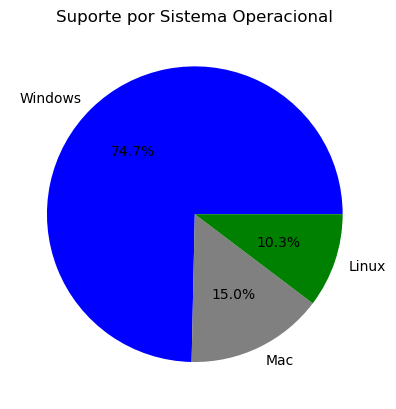

In [4]:
src.game.os_support_chart(df)

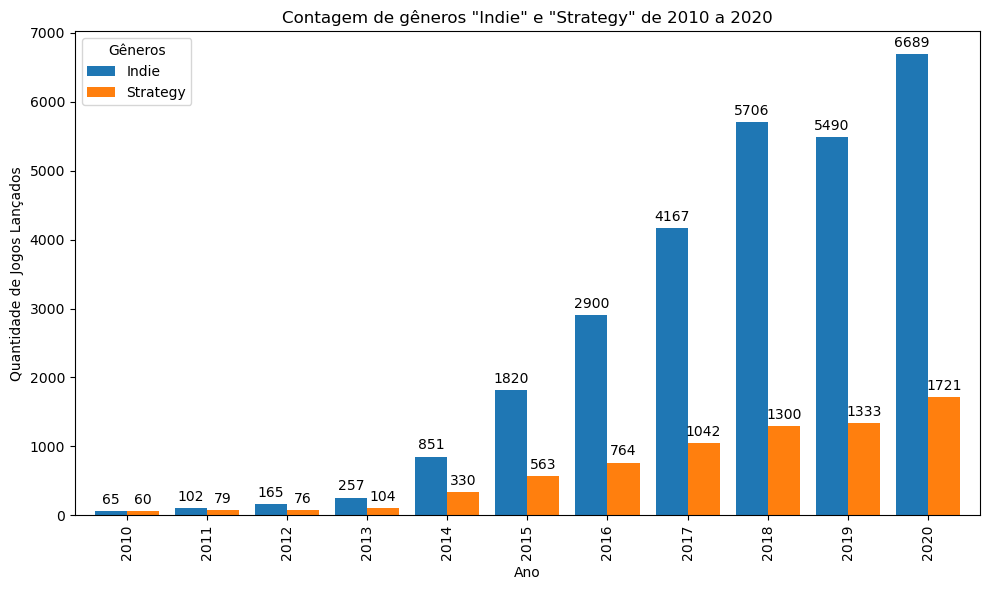

In [5]:
src.game.indie_strategy_trend(df)

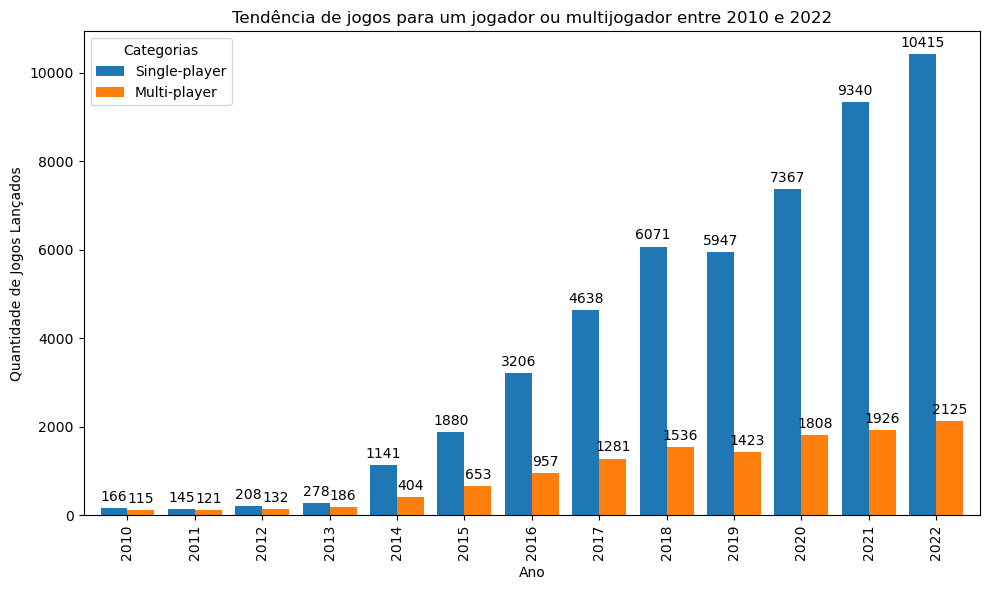

In [8]:
src.game.category_trend(df)